In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [10]:
df.count()

150

In [11]:
df.take(2)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa')]

**Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
Визуализируйте точечный график (plt.scatter) по каждой паре параметров
Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
Сделайте отдельную колонку для своего предсказания
Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)**

In [12]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [0]:
from pyspark.sql.functions import max, min, mean
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [14]:
param = '`petal.width`'
df1 = df.groupby('variety').agg(max(param).alias('max'), min(param).alias('min'), mean(param).alias('mean') )
print(param)
df1.show()

`petal.width`
+----------+---+---+------------------+
|   variety|max|min|              mean|
+----------+---+---+------------------+
| Virginica|2.5|1.4|             2.026|
|    Setosa|0.6|0.1|0.2459999999999999|
|Versicolor|1.8|1.0|1.3259999999999998|
+----------+---+---+------------------+



In [15]:
param = '`petal.length`'
df1 = df.groupby('variety').agg(max(param).alias('max'), min(param).alias('min'), mean(param).alias('mean') )
print(param)
df1.show()

`petal.length`
+----------+---+---+------------------+
|   variety|max|min|              mean|
+----------+---+---+------------------+
| Virginica|6.9|4.5|             5.552|
|    Setosa|1.9|1.0|1.4620000000000002|
|Versicolor|5.1|3.0|              4.26|
+----------+---+---+------------------+



In [16]:
param = '`sepal.length`'
df1 = df.groupby('variety').agg(max(param).alias('max'), min(param).alias('min'), mean(param).alias('mean') )
print(param)
df1.show()

`sepal.length`
+----------+---+---+-----------------+
|   variety|max|min|             mean|
+----------+---+---+-----------------+
| Virginica|7.9|4.9|6.587999999999998|
|    Setosa|5.8|4.3|5.005999999999999|
|Versicolor|7.0|4.9|            5.936|
+----------+---+---+-----------------+



In [17]:
param = '`sepal.width`'
df1 = df.groupby('variety').agg(max(param).alias('max'), min(param).alias('min'), mean(param).alias('mean') )
print(param)
df1.show()

`sepal.width`
+----------+---+---+------------------+
|   variety|max|min|              mean|
+----------+---+---+------------------+
| Virginica|3.8|2.2|2.9739999999999998|
|    Setosa|4.4|2.3| 3.428000000000001|
|Versicolor|3.4|2.0|2.7700000000000005|
+----------+---+---+------------------+



In [0]:
sepal_length = [row['sepal.length'] for row in df.select('`sepal.length`').collect()]
sepal_width = [row['sepal.width'] for row in df.select('`sepal.width`').collect()]
petal_length = [row['petal.length'] for row in df.select('`petal.length`').collect()]
petal_width = [row['petal.width'] for row in df.select('`petal.width`').collect()]
d = {
    'Setosa': 'r',
    'Virginica': 'b',
    'Versicolor': 'y'
}
variety = [d[row['variety']] for row in df.select('`variety`').collect()]



red_patch = mpatches.Patch(color='red', label='Setosa')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
yellow_patch = mpatches.Patch(color='yellow', label='Versicolor')



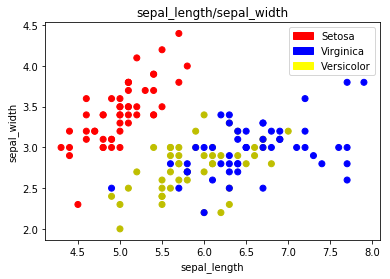

In [19]:
fig, ax = plt.subplots()

ax.scatter(sepal_length, sepal_width, c=variety)

ax.set_title('sepal_length/sepal_width')

ax.set_xlabel('sepal_length')

ax.set_ylabel('sepal_width')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

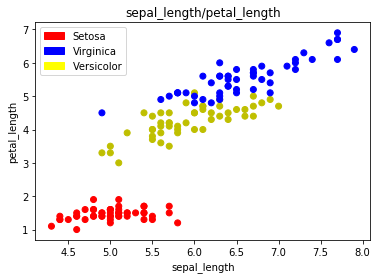

In [20]:
fig, ax = plt.subplots()

ax.scatter(sepal_length, petal_length, c=variety)

ax.set_title('sepal_length/petal_length')

ax.set_xlabel('sepal_length')

ax.set_ylabel('petal_length')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

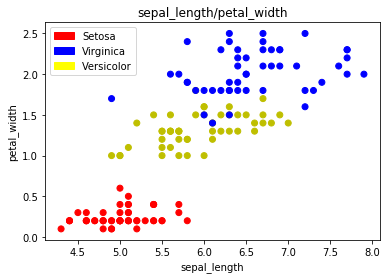

In [21]:
fig, ax = plt.subplots()

ax.scatter(sepal_length,petal_width, c=variety)

ax.set_title('sepal_length/petal_width')

ax.set_xlabel('sepal_length')

ax.set_ylabel('petal_width')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

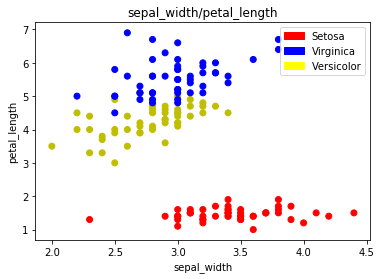

In [22]:
fig, ax = plt.subplots()

ax.scatter(sepal_width, petal_length, c=variety)

ax.set_title('sepal_width/petal_length')

ax.set_xlabel('sepal_width')

ax.set_ylabel('petal_length')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

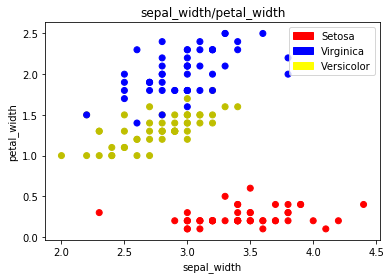

In [23]:
fig, ax = plt.subplots()

ax.scatter(sepal_width, petal_width, c=variety)

ax.set_title('sepal_width/petal_width')

ax.set_xlabel('sepal_width')

ax.set_ylabel('petal_width')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

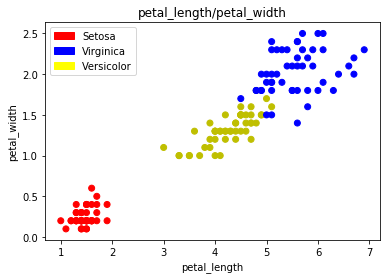

In [24]:
fig, ax = plt.subplots()

ax.scatter(petal_length, petal_width, c=variety)

ax.set_title('petal_length/petal_width')

ax.set_xlabel('petal_length')

ax.set_ylabel('petal_width')

ax.legend(handles=[red_patch, blue_patch, yellow_patch])

In [0]:
#красный petal_wigth<0.75 и petal_length<2
#синий petal_wigth> 1.4 и petal_length>4.5
#желтый 1<petal_wigth< 1.75 и 3<petal_length< 5

In [38]:
#красный petal_wigth < 0.75 и petal_length <2
df_setosa = df.withColumn('is_setosa', (df['`petal.width`'] < 0.75) & (df['`petal.width`'] < 2))
df_setosa.show(150)

+------------+-----------+------------+-----------+----------+---------+
|sepal.length|sepal.width|petal.length|petal.width|   variety|is_setosa|
+------------+-----------+------------+-----------+----------+---------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|     true|
|         4.9|        3.0|         1.4|        0.2|    Setosa|     true|
|         4.7|        3.2|         1.3|        0.2|    Setosa|     true|
|         4.6|        3.1|         1.5|        0.2|    Setosa|     true|
|         5.0|        3.6|         1.4|        0.2|    Setosa|     true|
|         5.4|        3.9|         1.7|        0.4|    Setosa|     true|
|         4.6|        3.4|         1.4|        0.3|    Setosa|     true|
|         5.0|        3.4|         1.5|        0.2|    Setosa|     true|
|         4.4|        2.9|         1.4|        0.2|    Setosa|     true|
|         4.9|        3.1|         1.5|        0.1|    Setosa|     true|
|         5.4|        3.7|         1.5|        0.2|

In [39]:
#желтый 1 < petal_wigth < 1.75 и 3 < petal_length < 5
df_versicolor = df.withColumn('is_versicolor', (df['`petal.width`'] > 1) & (df['`petal.width`'] < 1.75) & (df['`petal.length`'] > 3) & (df['`petal.length`'] < 5))
df_versicolor.show(150)

+------------+-----------+------------+-----------+----------+-------------+
|sepal.length|sepal.width|petal.length|petal.width|   variety|is_versicolor|
+------------+-----------+------------+-----------+----------+-------------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|        false|
|         4.9|        3.0|         1.4|        0.2|    Setosa|        false|
|         4.7|        3.2|         1.3|        0.2|    Setosa|        false|
|         4.6|        3.1|         1.5|        0.2|    Setosa|        false|
|         5.0|        3.6|         1.4|        0.2|    Setosa|        false|
|         5.4|        3.9|         1.7|        0.4|    Setosa|        false|
|         4.6|        3.4|         1.4|        0.3|    Setosa|        false|
|         5.0|        3.4|         1.5|        0.2|    Setosa|        false|
|         4.4|        2.9|         1.4|        0.2|    Setosa|        false|
|         4.9|        3.1|         1.5|        0.1|    Setosa|        false|

In [40]:
df_virginica = df.withColumn('is_virginica', (df['`petal.width`'] > 1.4) & (df['`petal.length`'] > 4.5))
df_virginica.show(150)

+------------+-----------+------------+-----------+----------+------------+
|sepal.length|sepal.width|petal.length|petal.width|   variety|is_virginica|
+------------+-----------+------------+-----------+----------+------------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|       false|
|         4.9|        3.0|         1.4|        0.2|    Setosa|       false|
|         4.7|        3.2|         1.3|        0.2|    Setosa|       false|
|         4.6|        3.1|         1.5|        0.2|    Setosa|       false|
|         5.0|        3.6|         1.4|        0.2|    Setosa|       false|
|         5.4|        3.9|         1.7|        0.4|    Setosa|       false|
|         4.6|        3.4|         1.4|        0.3|    Setosa|       false|
|         5.0|        3.4|         1.5|        0.2|    Setosa|       false|
|         4.4|        2.9|         1.4|        0.2|    Setosa|       false|
|         4.9|        3.1|         1.5|        0.1|    Setosa|       false|
|         5.

In [49]:
from pyspark.sql.functions import when, sum
df_with_predicts = df.withColumn('predict', when((df['`petal.width`'] < 0.75) & (df['`petal.width`'] < 2), 'Setosa')
                                 .when((df['`petal.width`'] > 1.4) & (df['`petal.length`'] > 4.5), 'Virginica').otherwise('Versicolor'))

df_with_predicts = df_with_predicts.withColumn('success', when(df_with_predicts['variety'] == df_with_predicts['predict'], 1).otherwise(0))
df_with_predicts.show(150)

+------------+-----------+------------+-----------+----------+----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|   variety|   predict|success|
+------------+-----------+------------+-----------+----------+----------+-------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|    Setosa|      1|
|         4.9|        3.0|         1.4|        0.2|    Setosa|    Setosa|      1|
|         4.7|        3.2|         1.3|        0.2|    Setosa|    Setosa|      1|
|         4.6|        3.1|         1.5|        0.2|    Setosa|    Setosa|      1|
|         5.0|        3.6|         1.4|        0.2|    Setosa|    Setosa|      1|
|         5.4|        3.9|         1.7|        0.4|    Setosa|    Setosa|      1|
|         4.6|        3.4|         1.4|        0.3|    Setosa|    Setosa|      1|
|         5.0|        3.4|         1.5|        0.2|    Setosa|    Setosa|      1|
|         4.4|        2.9|         1.4|        0.2|    Setosa|    Setosa|      1|
|         4.9|  

In [50]:
accuracy = df_with_predicts.agg(sum('success').alias('sum')).collect()[0][0] / df_with_predicts.count()
print(accuracy)

0.9333333333333333
